In [53]:
import pandas as pd
import datetime
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import sys
import seaborn as sns
import datetime
from home_features_parse import featureParser
#sys.path.insert(1, '../')
#from API.IdealDataInterface import IdealDataInterface
#from API.IdealMetadataInterface import IdealMetadataInterface

In [ ]:
meta_folder_path = 'D:\\MInf_data\\metadata'
meta_ideal = IdealMetadataInterface(meta_folder_path)

In [ ]:
folder_path = 'D:\\MInf_data\\sensordata'
ideal = IdealDataInterface(folder_path)

In [ ]:
def createDF(home_list):
    df_list = []
    for idx,home_id in enumerate(home_list):
        home_data = ideal.get(homeid = home_id, category = 'electric-mains')
        ds = home_data[0]['readings']
        df_resample = ds.resample('30T').mean()
        df_count = ds.resample('30T').count()
        df_resample.loc[df_count < 900] = np.nan
        df = df_resample.to_frame()
        name = 'electric-combined_'+str(idx)
        df.rename(columns={'electric-combined':name})
        df_list.append(df)
    df_all = pd.concat(df_list, axis=1)
    return df_all

In [ ]:
# calculate 95% confidence interval
def calculate95ConfInt(df_all):
    df = pd.DataFrame()
    df['avg'] = df_all.mean(axis=1)
    df['std'] = df_all.std(axis=1)
    df['avg'].interpolate("linear", order=3, inplace=True)
    df['std'].interpolate("nearest", inplace=True)
    df['min_val'] = np.where((df['avg'] - df['std']) < 0, 0,(df['avg'] - df['std']))
    df['max_val'] = df['avg'] + df['std']
    return df

In [ ]:
def plotAvgwithConfInt(df, htype, nrppl, bldera):
    #sns.lineplot(x = df.index, y = "avg", data = df)
    plt.plot(df.index, df.avg, c='purple', label = "average consumption")
    plt.fill_between(df.index, df.min_val, df.max_val, color='blue', alpha=.2, label = "Standard Deviation")
    title = "Avg consumption for " + htype + "s of " + nrppl + ", built " + bldera
    plt.title(title)
    plt.xlabel('time')
    plt.ylabel('average electricity consumption')
    xticks = pd.date_range(min(df.index), max(df.index), periods = 5)
    plt.xticks([x.strftime('%Y-%m-%d') for x in xticks])
    filename = htype + "_" + nrppl + "_" + bldera + ".png"
    plt.legend()
    plt.savefig('../../../imgs/' + filename)
    plt.show()

In [8]:
#home_list = [84, 102, 147, 148, 188, 190, 214, 212, 244, 252, 276, 284, 301, 304, 309, 322]
#featParse = featureParser(home_list, "test")
#featParse.homeData.avg.isna().sum()

home_list3 = [64, 73, 78, 76, 85, 93, 98, 97, 122, 123, 124, 139, 140, 180, 177, 182, 201, 218, 240, 255, 265, 280, 282, 287, 296, 334, 333]
name3 = 'flat_3 or more people_Before 1900'
featParse = featureParser(home_list3, name3)
featParse.homeData.avg.isna().sum()
#df_all = createDF(home_list)
#df = calculate95ConfInt(df_all)
#plotAvgwithConfInt(df, "flat", "3 or more people", "after 1900")



Found entries for 1592 sensor readings.
Found entries for 4824 sensor readings.
[64, 73, 78, 76, 85, 93, 98, 97, 122, 123, 124, 139, 140, 180, 177, 182, 201, 218, 240, 255, 265, 280, 282, 287, 296, 334, 333]


1869

<AxesSubplot:xlabel='time'>

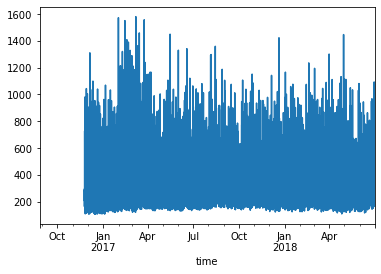

In [54]:
df = featParse.homeData
df = df.sort_values('time')
#df['avg'].interpolate(limit=1, inplace=True, limit_direction='both', limit_area='inside')
df.avg.plot()

In [58]:
df['year'] = pd.to_datetime(df.index).year
monthly_df = df.groupby(['year','month'],as_index=False).mean()

In [113]:
df.avg = df.avg.fillna(value = df.groupby([df.index.year, 'month']).avg.transform('mean'))

<AxesSubplot:xlabel='time'>

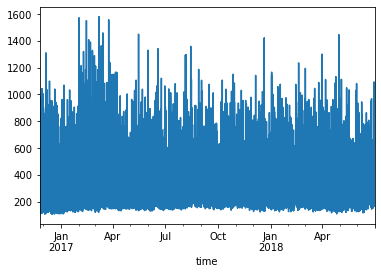

In [114]:
df.avg.plot()

In [ ]:
sd = pd.DataFrame(df['avg'].values.tolist(), index = df.index).mean(1)
df['avg'] = sd
df

In [ ]:
df_all[df_all.iloc[:, 0:16].count(axis=1)>=15]

In [2]:
# flat, 3 or more people, after 1900
home_list0 = [84, 102, 147, 148, 188, 190, 214, 212, 244, 252, 276, 284, 301, 304, 309, 322]
name0 = 'flat_3 or more people_After 1900'
#featParse = featureParser(home_list0, name0)
#flat, 2 or less ppl, before 1900
home_list1 = [62, 72, 74, 83, 105, 114, 116, 117, 119, 125, 136, 135, 144, 145, 150, 153, 156, 158, 160, 159, 167, 179, 205, 208, 215, 225, 227, 234, 249, 248, 250, 251, 253, 256, 267, 269, 275, 278, 279, 286, 292, 294, 295, 310, 311, 328, 319, 313, 323, 320]
name1 = 'flat_2 or less people_Before 1900'
#featParse = featureParser(home_list1, name1)
# flat, 2 or less ppl, after 1900
home_list2 = [47, 59, 67, 70, 75, 71, 77, 80, 91, 94, 100, 106, 118, 121, 128, 137, 141, 143, 149, 165, 157, 162, 189, 193, 194, 197, 213, 216, 221, 209, 226, 237, 239, 238, 241, 257, 258, 262, 272, 274, 285, 289, 288, 300, 302, 317, 321, 332]
name2 = 'flat_2 or less people_After 1900'
#featParse = featureParser(home_list2, name2)
# flat, 3 or more ppl, before 1900
home_list3 = [64, 73, 78, 76, 85, 93, 98, 97, 122, 123, 124, 139, 140, 180, 177, 182, 201, 218, 240, 255, 265, 280, 282, 287, 296, 334, 333]
name3 = 'flat_3 or more people_Before 1900'
#featParse = featureParser(home_list3, name3)
# house, 2 or less ppl, before 1965
home_list4 = [61, 63, 65, 68, 81, 86, 82, 89, 120, 126, 151, 155, 161, 178, 183, 266, 259, 281, 283, 291, 298, 305, 308, 315]
name4 = 'house_or_bungalow_2 or less people_Before 1965'
#featParse = featureParser(home_list4, name4)
# house, 2 or less ppl, after 1965
home_list5 = [88, 90, 101, 107, 169, 163, 175, 184, 186, 202, 203, 224, 231, 235, 260, 268, 277, 293, 303, 299, 329, 331]
name5 = 'house_or_bungalow_2 or less people_After 1965'
#featParse = featureParser(home_list5, name5)
# house, 3 or more ppl, before 1965
home_list6 = [92, 96, 99, 133, 134, 138, 146, 152, 154, 164, 166, 168, 174, 176, 185, 187, 192, 195, 199, 200, 206, 210, 211, 222, 229, 232, 230, 243, 245, 247, 261, 264, 263, 270, 273, 290, 306, 307, 326, 327, 330]
name6 = 'house_or_bungalow_3 or more people_Before 1965'
#featParse = featureParser(home_list6, name6)
# house, 3 or more ppl, after 1965. house 223 has no electric-mains issued
home_list7 = [66, 69, 79, 109, 110, 115, 129, 113, 170, 173, 181, 191, 207, 233, 236, 242, 246, 254, 316, 318, 325, 335]
name7 = 'house_or_bungalow_3 or more people_After 1965'
#featParse = featureParser(home_list7, name7)

In [5]:
homeList = home_list0 + home_list1 + home_list2 + home_list3 + home_list4 + home_list5 + home_list6 + home_list7
name = "all_houses"
featParse = featureParser(homeList, name)

Found entries for 1592 sensor readings.
Found entries for 4824 sensor readings.
[84, 102, 147, 148, 188, 190, 214, 212, 244, 252, 276, 284, 301, 304, 309, 322, 62, 72, 74, 83, 105, 114, 116, 117, 119, 125, 136, 135, 144, 145, 150, 153, 156, 158, 160, 159, 167, 179, 205, 208, 215, 225, 227, 234, 249, 248, 250, 251, 253, 256, 267, 269, 275, 278, 279, 286, 292, 294, 295, 310, 311, 328, 319, 313, 323, 320, 47, 59, 67, 70, 75, 71, 77, 80, 91, 94, 100, 106, 118, 121, 128, 137, 141, 143, 149, 165, 157, 162, 189, 193, 194, 197, 213, 216, 221, 209, 226, 237, 239, 238, 241, 257, 258, 262, 272, 274, 285, 289, 288, 300, 302, 317, 321, 332, 64, 73, 78, 76, 85, 93, 98, 97, 122, 123, 124, 139, 140, 180, 177, 182, 201, 218, 240, 255, 265, 280, 282, 287, 296, 334, 333, 61, 63, 65, 68, 81, 86, 82, 89, 120, 126, 151, 155, 161, 178, 183, 266, 259, 281, 283, 291, 298, 305, 308, 315, 88, 90, 101, 107, 169, 163, 175, 184, 186, 202, 203, 224, 231, 235, 260, 268, 277, 293, 303, 299, 329, 331, 92, 96, 99, 133, 

<AxesSubplot:xlabel='time'>

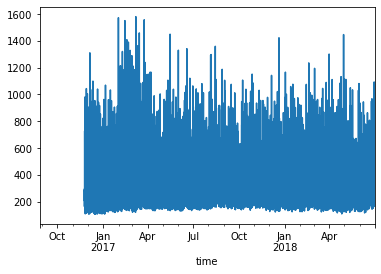

In [110]:
df = featParse.homeData
df = df.sort_values('time')
#df['avg'].interpolate(limit=1, inplace=True, limit_direction='both', limit_area='inside')
df.avg.plot()

In [111]:
df.loc[df.number<10, ['avg']] = np.nan
start_idx = df.avg.first_valid_index()
end_idx = df.avg.last_valid_index()
if start_idx is not None:
    df = df[start_idx:]
if end_idx is not None:
    df = df[:end_idx]

In [112]:
df.isna().sum()

meantemp           79
number              0
avg              1235
max_val          1146
hour                0
month               0
weekend             0
business hour       0
daylight            0
season              0
qtr                 0
day                 0
dtype: int64

<AxesSubplot:xlabel='time'>

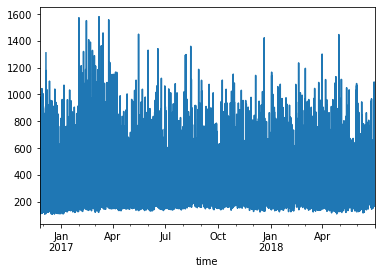

In [103]:
df.avg.plot()

In [ ]:
#filepath = 'C:\Users\Alex\OneDrive\Desktop\Universitate\Anul 4\MInf\implementation\MInf-Project\generated_data'
filename = "flat_3 or more people_After 1900.zip"
df_created = pd.read_csv('..\generated_data\\' + filename)
df_created.set_index('time')

In [ ]:
df_created.

In [ ]:
hl = [102, 147, 148, 188, 190, 214, 212, 244, 252, 276, 284, 301, 304, 309, 322]
for h in hl:
    home_data = ideal.get(homeid = h, category = 'electric-mains')
    ds = home_data[0]['readings']
    print(ds.head(5))

In [ ]:
set_twilight_dict = {
            'January': datetime.time(hour=17, minute=0),
            'February': datetime.time(hour=18, minute=0),
            'March': datetime.time(hour=19, minute=0),
            'April': datetime.time(hour=21, minute=0),
            'May': datetime.time(hour=22, minute=0),
            'June': datetime.time(hour=23, minute=0),
            'July': datetime.time(hour=22, minute=45),
            'August': datetime.time(hour=21, minute=30),
            'September': datetime.time(hour=20, minute=0),
            'October': datetime.time(hour=18, minute=45),
            'November': datetime.time(hour=16, minute=50),
            'December': datetime.time(hour=16, minute=0)
        }
sunrise_dict = {
            'January': datetime.time(hour=8, minute=30),
            'February': datetime.time(hour=7, minute=40),
            'March': datetime.time(hour=6, minute=30),
            'April': datetime.time(hour=6, minute=0),
            'May': datetime.time(hour=5, minute=0),
            'June': datetime.time(hour=4, minute=26),
            'July': datetime.time(hour=4, minute=45),
            'August': datetime.time(hour=5, minute=45),
            'September': datetime.time(hour=6, minute=45),
            'October': datetime.time(hour=7, minute=40),
            'November': datetime.time(hour=7, minute=50),
            'December': datetime.time(hour=8, minute=40)
        }
weatherDF = pd.read_csv(folder_path + '\weatherreading.csv.gz')
metaweatherDF = meta_ideal._metafile('weatherfeed')['weatherfeed']
metahomes = meta_ideal._metafile('home')['home']


home_list = [84, 102]
home_data = ideal.get(homeid = home_list[0], category = 'electric-mains')

loc = metahomes[metahomes.homeid==home_list[0]].get('location').item()
feedid = metaweatherDF[(metaweatherDF.locationid == loc) & (metaweatherDF.weather_type=='temperature')].get('feedid').item()
allWeather = weatherDF[weatherDF.feedid == feedid]
allWeather['time'] = pd.to_datetime(allWeather['time']).dt.round('30min')
allWeather = allWeather.astype({'value':int})
allWeather.drop(columns = ['feedid'], inplace = True)
allWeather = allWeather.set_index('time').resample('30T').mean()
allWeather.reset_index(inplace = True)
strn = 'value_' + str(0)
allWeather.rename(columns={'value':strn}, inplace = True)
#allWeather.set_index('time')

ds = home_data[0]['readings']
df_resample = ds.resample('30T').mean()
df_count = ds.resample('30T').count()
df_resample.loc[df_count < 900] = np.nan
df_all = df_resample.to_frame()

name = 'electric-combined_'+str(0)
df_all.rename(columns={'electric-combined':name}, inplace = True)
df_all.reset_index(inplace = True)

for idx,home_id in enumerate(home_list[1:], start=1):
    home_data = ideal.get(homeid = home_id, category = 'electric-mains')
    
    loc = metahomes[metahomes.homeid==home_id].get('location').item()
    feedid = metaweatherDF[(metaweatherDF.locationid == loc) & (metaweatherDF.weather_type=='temperature')].get('feedid').item()
    weatherInfo = weatherDF[weatherDF.feedid == feedid]
    weatherInfo['time'] = pd.to_datetime(weatherInfo['time']).dt.round('30min')
    weatherInfo = weatherInfo.astype({'value':int})
    weatherInfo.drop(columns = ['feedid'], inplace = True)
    weatherInfo = weatherInfo.set_index('time').resample('30T').mean()
    weatherInfo.reset_index(inplace = True)
    strn = 'value_' + str(idx)
    weatherInfo.rename(columns={'value':strn}, inplace = True)
    #weatherInfo.set_index('time')
    allWeather = pd.merge(allWeather, weatherInfo, how='outer', left_on = 'time', right_on = 'time')
    
    ds = home_data[0]['readings']
    df_resample = ds.resample('30T').mean()
    df_count = ds.resample('30T').count()
    df_resample.loc[df_count < 900] = np.nan
    df = df_resample.to_frame()
    
    name = 'electric-combined_'+str(idx)
    df.rename(columns={'electric-combined':name}, inplace = True)
    df.reset_index(inplace = True)
    df_all = pd.merge(df_all, df, how='outer', left_on = 'time', right_on = 'time')


df_all.set_index('time', inplace = True)

In [ ]:
df_all

In [ ]:
allWeather['value'] = allWeather.mean(axis=1).round()
allWeather['2017-01-31 13:30:00':'2018-06-12 07:30:00']

In [ ]:
allWeather.reset_index(inplace = True)
df = pd.DataFrame(index = df_all.index)

df.reset_index(inplace=True)
allWeather.set_index('time', inplace = True)
meanWeather = pd.DataFrame(index = allWeather.index)
meanWeather['meantemp'] = allWeather.mean(axis=1).round()
meanWeather.reset_index(inplace = True)
df = pd.merge(df, meanWeather, how='left', left_on = 'time', right_on = 'time')
print(df)

In [ ]:
allWeather.reset_index(inplace = True)
df = pd.DataFrame(index = df_all.index)

df.reset_index(inplace=True)
allWeather.set_index('time', inplace = True)
meanWeather = pd.DataFrame(index = allWeather.index)
meanWeather['meantemp'] = allWeather.mean(axis=1).round()
meanWeather.reset_index(inplace = True)
df = pd.merge(df, meanWeather, how='left', left_on = 'time', right_on = 'time')
df.set_index('time', inplace = True)

df['avg'] = df_all.mean(axis=1)
#df['std'] = df_all.std(axis=1)
df['avg'].interpolate("linear", inplace=True)
df['month'] = df.index.month
df['monthname'] = df.index.month_name()
df['year'] = df.index.year
df['weekend'] = df.index.weekday>4
df['weekend'] = df['weekend'].astype(int) 
df['sunrise'] = df['monthname'].map(sunrise_dict)
df['twilight'] = df['monthname'].map(set_twilight_dict)
df['daysun'] = df.index.time >= df.sunrise
df['daytwi'] = df.index.time <= df.twilight
df['daylight'] = df['daysun'] & df['daytwi']
df['daylight'] = df['daylight'].astype(int)
df.drop(columns = ['monthname', 'sunrise', 'twilight','daysun','daytwi'], inplace = True)
df

In [ ]:
weatherDF = pd.read_csv(folder_path + '\weatherreading.csv.gz')

In [ ]:
weatherDF

In [ ]:
metaweatherDF = pd.read_csv(meta_folder_path + '\weatherfeed.csv')

In [ ]:
metaweatherDF

In [ ]:
#Edinburgh
weatherDF[weatherDF.feedid == 1]  #temperature

In [ ]:

#westLothian
weatherDF[weatherDF.feedid == 16]  #temperature

In [ ]:
#Midlothian
weatherDF[weatherDF.feedid == 21]  #temperature

In [ ]:

#eastLothian
weatherDF[weatherDF.feedid == 26]  #temperature

In [ ]:

#Fife
weatherDF[weatherDF.feedid == 31]  #temperature

In [ ]:
mean([1,2,3,4,5,6,7,8][:9])

In [ ]:
def mean(l):
    return l.sum() / len(l)